# Predicting Car Value Using K Neighbors Regression

Is it possible to predict the value of a car based purely on measurable features?

When purchasing a car, we see a lot of advertising and have ingrained brand awareness. How much does the brand and advertising contribute to the sticker price of the car. Are we paying for features that can be measured, such as size, weight, engine size, etc. Or, are we really paying for the brand?

## Data Import and Cleaning

Taking a dataset from UCI we will make an attempt to answer this question.

### Dataset Information

Source:

Creator/Donor:

Jeffrey C. Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu)

Sources:

1) 1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
2) Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038
3) Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037

Data Set Information:

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.


In [45]:
import pandas as pd
import numpy as np

In [46]:
file_path = './data/imports-85.data'
columns = ['Symbolizing',
          'Normalized Losses',
          'Make',
          'Fuel Type',
          'Aspiration',
          'Number of Doors',
          'Body Style',
          'Drive Wheels',
          'Engine Location',
          'Wheel Base',
          'Length',
          'Width',
          'Height',
          'Curb Weight',
          'Engine Type',
          'Number of Cylinders',
          'Engine Size',
          'Fuel System',
          'Bore',
          'Stroke',
          'Compression Ratio',
          'Horsepower',
          'Peak RPM',
          'City MPG',
          'Highway MPG',
          'Price']

In [47]:
data = pd.read_csv(file_path, header=None)
data.columns = columns

In [48]:
data.head()

,Symbolizing,Normalized Losses,Make,Fuel Type,Aspiration,Number of Doors,Body Style,Drive Wheels,Engine Location,Wheel Base,...,Engine Size,Fuel System,Bore,Stroke,Compression Ratio,Horsepower,Peak RPM,City MPG,Highway MPG,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [49]:
numeric_features = ['Symbolizing',
                    'Normalized Losses',
                    'Wheel Base',
                    'Length',
                    'Width',
                    'Height',
                    'Curb Weight',
                    'Engine Size',
                    'Bore',
                    'Stroke',
                    'Compression Ratio',
                    'Horsepower',
                    'Peak RPM',
                    'City MPG',
                    'Highway MPG']
target = ['price']

In [50]:
data = data.replace('?', np.nan)

In [51]:
data.dtypes

Symbolizing              int64
Normalized Losses       object
Make                    object
Fuel Type               object
Aspiration              object
Number of Doors         object
Body Style              object
Drive Wheels            object
Engine Location         object
Wheel Base             float64
Length                 float64
Width                  float64
Height                 float64
Curb Weight              int64
Engine Type             object
Number of Cylinders     object
Engine Size              int64
Fuel System             object
Bore                    object
Stroke                  object
Compression Ratio      float64
Horsepower              object
Peak RPM                object
City MPG                 int64
Highway MPG              int64
Price                   object
dtype: object

In [52]:
dtypes = {
    'Normalized Losses':'float64',
    'Bore':'float64',
    'Stroke':'float64',
    'Horsepower':'float64',
    'Peak RPM':'float64',
    'Price':'float64'}
    

In [53]:
data = data.astype(dtypes)

In [54]:
data.isnull().sum()/len(data)

Symbolizing            0.000000
Normalized Losses      0.200000
Make                   0.000000
Fuel Type              0.000000
Aspiration             0.000000
Number of Doors        0.009756
Body Style             0.000000
Drive Wheels           0.000000
Engine Location        0.000000
Wheel Base             0.000000
Length                 0.000000
Width                  0.000000
Height                 0.000000
Curb Weight            0.000000
Engine Type            0.000000
Number of Cylinders    0.000000
Engine Size            0.000000
Fuel System            0.000000
Bore                   0.019512
Stroke                 0.019512
Compression Ratio      0.000000
Horsepower             0.009756
Peak RPM               0.009756
City MPG               0.000000
Highway MPG            0.000000
Price                  0.019512
dtype: float64

After looking at the missing values, I will be opting to get rid of all observations missing Normalized Losses. This will be a big hit, since it appears to be about 20% of the data. However, I don't think that I could fill those missing values with anything useful at this moment in the process. Perhaps after some more careful understanding of the Normalized Losses value, I could use some imputation methods if I find the data lacking.

In [55]:
data = data.dropna(subset=['Normalized Losses'])

In [56]:
numeric_data = data[numeric_features]

In [57]:
numeric_data = (numeric_data - numeric_data.min()) / (numeric_data.max() - numeric_data.min())

In [58]:
numeric_data.head()

,Symbolizing,Normalized Losses,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Bore,Stroke,Compression Ratio,Horsepower,Peak RPM,City MPG,Highway MPG
3,0.8,0.518325,0.455172,0.577236,0.517544,0.471154,0.329325,0.243655,0.464286,0.633333,0.18750,0.355263,0.551020,0.264706,0.333333
4,0.8,0.518325,0.441379,0.577236,0.535088,0.471154,0.518231,0.380711,0.464286,0.633333,0.06250,0.440789,0.551020,0.088235,0.111111
6,0.6,0.486911,0.662069,0.839024,0.973684,0.605769,0.525989,0.380711,0.464286,0.633333,0.09375,0.407895,0.551020,0.117647,0.194444
8,0.6,0.486911,0.662069,0.839024,0.973684,0.625000,0.619860,0.355330,0.421429,0.633333,0.08125,0.605263,0.551020,0.058824,0.055556
10,0.8,0.664921,0.503448,0.580488,0.394737,0.471154,0.351823,0.238579,0.685714,0.347619,0.11250,0.348684,0.673469,0.235294,0.305556


In [59]:
numeric_data['Price'] = data['Price']

In [60]:
numeric_data.head()

,Symbolizing,Normalized Losses,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Bore,Stroke,Compression Ratio,Horsepower,Peak RPM,City MPG,Highway MPG,Price
3,0.8,0.518325,0.455172,0.577236,0.517544,0.471154,0.329325,0.243655,0.464286,0.633333,0.18750,0.355263,0.551020,0.264706,0.333333,13950.0
4,0.8,0.518325,0.441379,0.577236,0.535088,0.471154,0.518231,0.380711,0.464286,0.633333,0.06250,0.440789,0.551020,0.088235,0.111111,17450.0
6,0.6,0.486911,0.662069,0.839024,0.973684,0.605769,0.525989,0.380711,0.464286,0.633333,0.09375,0.407895,0.551020,0.117647,0.194444,17710.0
8,0.6,0.486911,0.662069,0.839024,0.973684,0.625000,0.619860,0.355330,0.421429,0.633333,0.08125,0.605263,0.551020,0.058824,0.055556,23875.0
10,0.8,0.664921,0.503448,0.580488,0.394737,0.471154,0.351823,0.238579,0.685714,0.347619,0.11250,0.348684,0.673469,0.235294,0.305556,16430.0


In [61]:
numeric_data.isnull().sum()

Symbolizing          0
Normalized Losses    0
Wheel Base           0
Length               0
Width                0
Height               0
Curb Weight          0
Engine Size          0
Bore                 4
Stroke               4
Compression Ratio    0
Horsepower           0
Peak RPM             0
City MPG             0
Highway MPG          0
Price                0
dtype: int64

Bore and Stroke are missing relatively few values, so I will be removing these missing value observations.

In [62]:
numeric_data = numeric_data.dropna(subset=['Bore','Stroke'])

In [63]:
numeric_data.isna().sum()

Symbolizing          0
Normalized Losses    0
Wheel Base           0
Length               0
Width                0
Height               0
Curb Weight          0
Engine Size          0
Bore                 0
Stroke               0
Compression Ratio    0
Horsepower           0
Peak RPM             0
City MPG             0
Highway MPG          0
Price                0
dtype: int64

Now that all missing Values have been removed, it is time to move on with some regression.

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [65]:
def knn_train_test(feature, target, data):
  split_point = len(data) // 2

  train = data.iloc[:split_point]
  test = data.iloc[split_point:]
  np.random.seed(1)
  
  knn =KNeighborsRegressor()
  knn.fit(train[[feature]], train[target])

  predictions = knn.predict(test[[feature]])
  mse = mean_squared_error(predictions, test[target])
  rmse = np.sqrt(mse)

  return rmse

In [66]:
univariate_rmse = {}

for col in numeric_data.columns[:-1]:
  univariate_rmse[col] = knn_train_test(col, 'Price', numeric_data)

univariate_rmse = pd.Series(univariate_rmse)


In [67]:
print(univariate_rmse.sort_values())

Curb Weight          2555.613489
Width                2910.765268
Horsepower           3079.557787
Engine Size          3441.864944
Highway MPG          3551.763518
Length               3575.524005
City MPG             3987.602512
Wheel Base           4339.475060
Height               5401.375422
Symbolizing          5767.644254
Stroke               6407.082500
Compression Ratio    7099.750585
Peak RPM             8004.226103
Normalized Losses    8436.046689
Bore                 9127.943900
dtype: float64


In [68]:
def knn_train_test_k_neighbors(feature, target, k, data):
  split_point = len(data) // 2

  train = data.iloc[:split_point]
  test = data.iloc[split_point:]
  np.random.seed(1)
  
  knn =KNeighborsRegressor(n_neighbors=k)
  knn.fit(train[[feature]], train[target])

  predictions = knn.predict(test[[feature]])
  mse = mean_squared_error(predictions, test[target])
  rmse = np.sqrt(mse)

  return rmse

In [69]:
import matplotlib.pyplot as plt

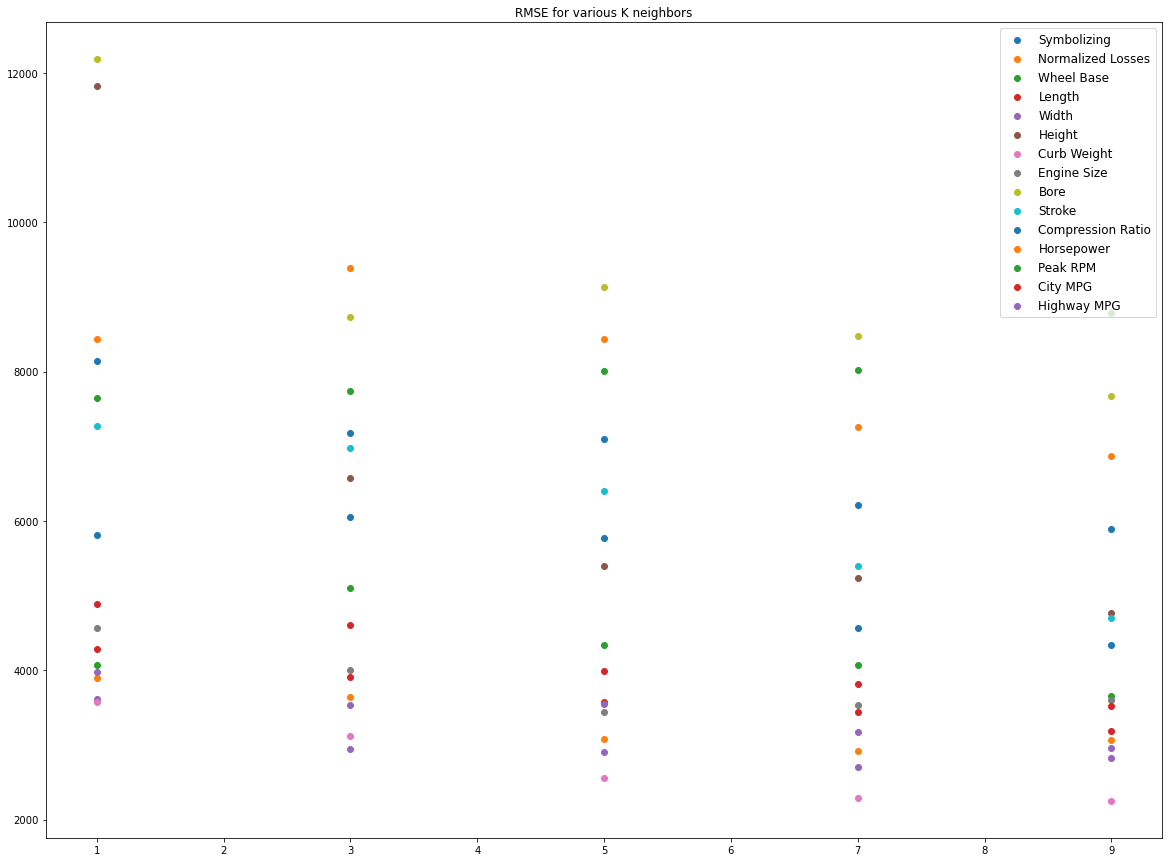

In [70]:
neighbors = [1,3,5,7,9]
plt.figure(figsize=(20,15)) 
for col in numeric_data.columns[:-1]:
  k_rmse = {}
  
  for k in neighbors:
    k_rmse[k] = knn_train_test_k_neighbors(col, 'Price', k, numeric_data)
  plt.scatter(x=k_rmse.keys(), y=k_rmse.values(),label=col)
plt.title('RMSE for various K neighbors') 
plt.legend(loc=0, prop={'size': 12})
plt.show()
  

### How K Affects RMSE

When comparing different numbers of nearest neighbors, we want to get a low RMSE value without overfitting. It looks like the best choice for K is 5, since it works well across the majority of the available features.